In [1]:
import sys

sys.path.append("/nas/home/sh0416/sentence-benchmark/src")
print(f"{sys.executable = }")
print(f"{sys.path = }")

sys.executable = '/home/sh0416/anaconda3/envs/sentence-benchmark/bin/python'
sys.path = ['/nas/home/sh0416/sentence-benchmark/src/notebooks', '/home/sh0416/.vscode-server/extensions/ms-toolsai.jupyter-2021.9.1101343141/pythonFiles/vscode_datascience_helpers', '/home/sh0416/.vscode-server/extensions/ms-toolsai.jupyter-2021.9.1101343141/pythonFiles', '/home/sh0416/.vscode-server/extensions/ms-toolsai.jupyter-2021.9.1101343141/pythonFiles/lib/python', '/home/sh0416/anaconda3/envs/sentence-benchmark/lib/python38.zip', '/home/sh0416/anaconda3/envs/sentence-benchmark/lib/python3.8', '/home/sh0416/anaconda3/envs/sentence-benchmark/lib/python3.8/lib-dynload', '', '/home/sh0416/anaconda3/envs/sentence-benchmark/lib/python3.8/site-packages', '/home/sh0416/anaconda3/envs/sentence-benchmark/lib/python3.8/site-packages/IPython/extensions', '/home/sh0416/.ipython', '/nas/home/sh0416/sentence-benchmark/src']


In [2]:
import json
from sentsim.config import ModelArguments

with open("/home/sh0416/checkpoints/20211029_101219/model_args.json") as f:
    model_args = ModelArguments(**json.load(f))

print(f"{model_args = }")


model_args = ModelArguments(model_name_or_path='bert-base-uncased', loss_type='rwmdcse', temp=0.05, hidden_dropout_prob=0.1, mlp_only_train=True, coeff_mlm=0.1, loss_rwmd=False, layer_idx=12)


In [3]:
from sentsim.models.models import create_contrastive_learning

module = create_contrastive_learning(model_args)
print(f"{module = }")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


module = SimcseLearningModule(
  (model): SentenceSimilarityModel(
    (representation_model): LastHiddenSentenceRepresentationModel(
      (model): BertModel(
        (embeddings): BertEmbeddings(
          (word_embeddings): Embedding(30522, 768, padding_idx=0)
          (position_embeddings): Embedding(512, 768)
          (token_type_embeddings): Embedding(2, 768)
          (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (encoder): BertEncoder(
          (layer): ModuleList(
            (0): BertLayer(
              (attention): BertAttention(
                (self): BertSelfAttention(
                  (query): Linear(in_features=768, out_features=768, bias=True)
                  (key): Linear(in_features=768, out_features=768, bias=True)
                  (value): Linear(in_features=768, out_features=768, bias=True)
                  (dropout): Dropout(p=0.1, inplace=False)
                )
 

In [4]:
import torch
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("/home/sh0416/checkpoints/20211029_101219/checkpoint-2000")
module.load_state_dict(torch.load("/home/sh0416/checkpoints/20211029_101219/checkpoint-2000/pytorch_model.bin"))


<All keys matched successfully>

In [5]:
from sentsim.data.sts import load_sts12
sts12 = load_sts12("/nas/home/sh0416/data/STS/STS12-en-test")

In [6]:
import random

random.seed(0)
# pos_example = sorted(list(filter(lambda x: x.score > 4, sts12["MSRpar"])), key=lambda x: len(x.input[0]))[0]
# neg_example = sorted(list(filter(lambda x: x.score < 2, sts12["MSRpar"])), key=lambda x: len(x.input[0]))[0]
pos_example = sts12["MSRpar"][0]
neg_example = sts12["MSRpar"][8]
print(f"{pos_example = }")
print(f"{neg_example = }")

pos_example = (['the problem likely will mean corrective changes before the shuttle fleet starts flying again .', 'he said the problem needs to be corrected before the space shuttle fleet is cleared to fly again .'], 4.4)
neg_example = (["in afternoon trading in europe , france 's cac-40 advanced and britain 's ftse 100 each gained 0.7 percent , while germany 's dax index rose 0.6 percent .", "in europe , france 's cac-40 rose 1.3 percent , britain 's ftse 100 declined 0.2 percent and germany 's dax index gained 0.6 percent ."], 2.0)


In [7]:
def get_inputs_and_outputs(example):
    inputs = tokenizer(example[0], padding=True, return_tensors="pt")
    outputs = module.model.representation_model(inputs)
    return inputs, outputs


pos_inputs, pos_outputs = get_inputs_and_outputs(pos_example)
neg_inputs, neg_outputs = get_inputs_and_outputs(neg_example)
print(f"{pos_inputs = }, {pos_outputs = }")
print(f"{pos_outputs[0].shape = }")

pos_inputs = {'input_ids': tensor([[  101,  1996,  3291,  3497,  2097,  2812,  6149,  3512,  3431,  2077,
          1996, 10382,  4170,  4627,  3909,  2153,  1012,   102,     0,     0,
             0],
        [  101,  2002,  2056,  1996,  3291,  3791,  2000,  2022, 13371,  2077,
          1996,  2686, 10382,  4170,  2003,  5985,  2000,  4875,  2153,  1012,
           102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}, pos_outputs = (tensor([[[ 0.0951,  0.0405,  0.1960,  ..., -0.0358,  0.0053,  0.0760],
         [-0.0568, -0.2330,  0.2636,  ...,  0.0143,  0.1654,  0.2513],
         [-0.0152, -0.3721,  0.4139,  ...,  0.0393,  0.3105,  0.2378],
         ...,
         [ 0.1474, -0.0401,  0.1300,  ..., -0.

sts12['MSRpar'][4] = (['vivendi shares closed 1.9 percent at 15.80 euros in paris after falling 3.6 percent on monday .', 'in new york , vivendi shares were 1.4 percent down at $ 18.29 .'], 1.4)


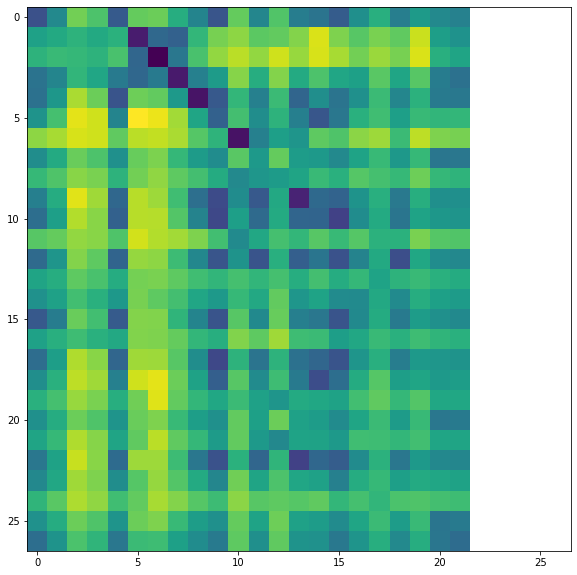

In [8]:
import matplotlib.pyplot as plt
import torch.nn.functional as F

print(f"{sts12['MSRpar'][4] = }")
pos_inputs, pos_outputs = get_inputs_and_outputs(sts12["MSRpar"][4])
fig, ax = plt.subplots(figsize=(30, 10))
#plt.imshow(pos_outputs[0][0].detach().cpu())
with torch.no_grad():
    sim = 1 - F.cosine_similarity(pos_outputs[0][0, :, None, :], pos_outputs[0][1, None, :, :], dim=-1)
    inf = torch.tensor(float("-inf"), device=sim.device)
    sim = torch.where(pos_outputs[1][0, :, None], sim, inf)
    sim = torch.where(pos_outputs[1][1, None, :], sim, inf)
plt.imshow(sim.detach().cpu())

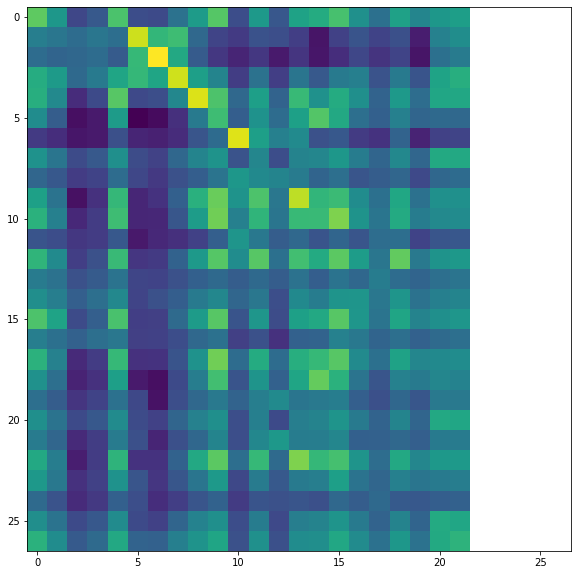

In [9]:
import matplotlib.pyplot as plt
import torch.nn.functional as F

pos_inputs, pos_outputs = get_inputs_and_outputs(sts12["MSRpar"][4])
fig, ax = plt.subplots(figsize=(30, 10))
#plt.imshow(pos_outputs[0][0].detach().cpu())
with torch.no_grad():
    sim = F.cosine_similarity(pos_outputs[0][0, :, None, :], pos_outputs[0][1, None, :, :], dim=-1)
    inf = torch.tensor(float("-inf"), device=sim.device)
    sim = torch.where(pos_outputs[1][0, :, None], sim, inf)
    sim = torch.where(pos_outputs[1][1, None, :], sim, inf)
plt.imshow(sim.detach().cpu())

In [10]:
import torch
import torch.nn.functional as F


def get_pairwise_sim(example, inputs, outputs):
    last_hidden_state1 = outputs.last_hidden_state[0]
    last_hidden_state2 = outputs.last_hidden_state[1]
    pairwise_sim = F.cosine_similarity(
        last_hidden_state1[:, None, :], last_hidden_state2[None, :, :], dim=2
    )

    attention_mask1 = inputs.attention_mask[0]
    attention_mask2 = inputs.attention_mask[1]
    pairwise_valid = torch.logical_and(
        attention_mask1[:, None], attention_mask2[None, :]
    )

    input_length1 = attention_mask1.count_nonzero()
    input_length2 = attention_mask2.count_nonzero()
    pairwise_valid_sim = torch.masked_select(pairwise_sim, pairwise_valid).view(
        input_length1, input_length2
    )
    return pairwise_valid_sim


pos_pairwise_sim = get_pairwise_sim(pos_example, pos_inputs, pos_outputs)
neg_pairwise_sim = get_pairwise_sim(neg_example, neg_inputs, neg_outputs)

In [11]:
def get_input_strs(inputs):
    input_strs1 = list(
        filter(
            lambda x: x != "<pad>", tokenizer.convert_ids_to_tokens(inputs.input_ids[0])
        )
    )
    input_strs2 = list(
        filter(
            lambda x: x != "<pad>", tokenizer.convert_ids_to_tokens(inputs.input_ids[1])
        )
    )
    return input_strs1, input_strs2


pos_input_strs1, pos_input_strs2 = get_input_strs(pos_inputs)
neg_input_strs1, neg_input_strs2 = get_input_strs(neg_inputs)

In [12]:
pos_sentence1, pos_sentence2 = tokenizer.batch_decode(pos_inputs.input_ids)
neg_sentence1, neg_sentence2 = tokenizer.batch_decode(neg_inputs.input_ids)

<s>the problem likely will mean corrective changes before the shuttle fleet starts flying again.</s><pad><pad><pad><pad>
<s>he said the problem needs to be corrected before the space shuttle fleet is cleared to fly again.</s>


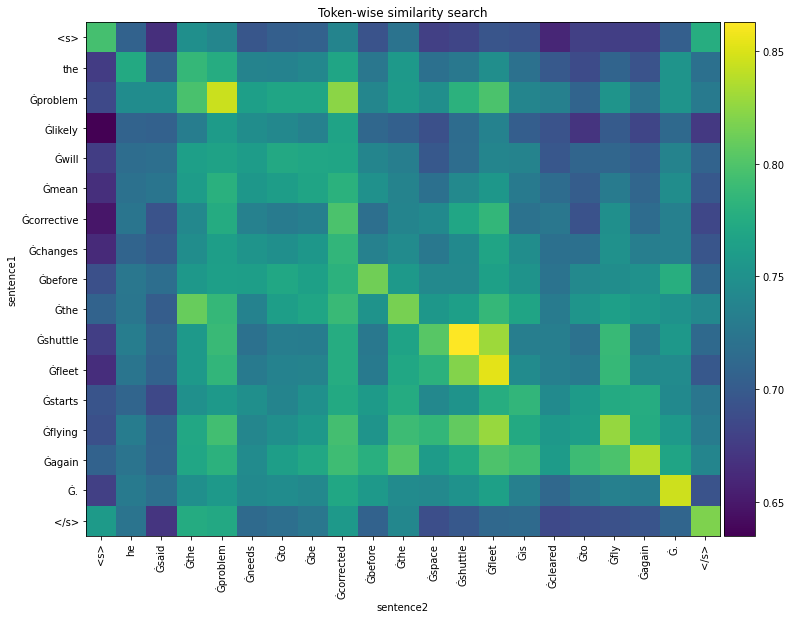

<s>in afternoon trading in europe, france's cac-40 advanced and britain's ftse 100 each gained 0.7 percent, while germany's dax index rose 0.6 percent.</s>
<s>in europe, france's cac-40 rose 1.3 percent, britain's ftse 100 declined 0.2 percent and germany's dax index gained 0.6 percent.</s><pad>


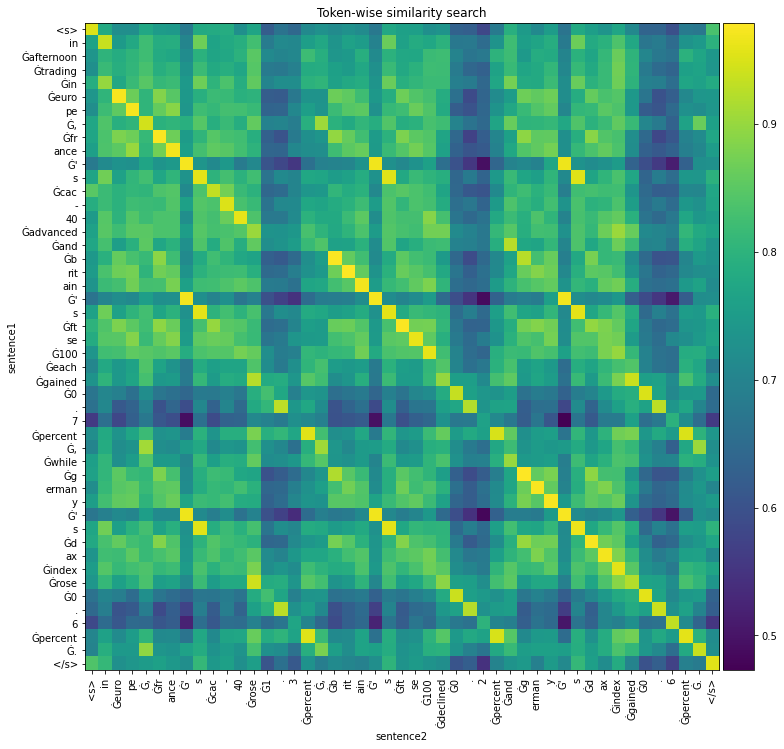

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


def plot(pairwise_sim, input_strs1, input_strs2):
    fig, ax = plt.subplots(figsize=(12, 12))
    fig.patch.set_facecolor("#ffffff")
    ax.set_title("Token-wise similarity search")
    ax.set_ylabel("sentence1")
    ax.set_xlabel("sentence2")
    ax.set_yticks(range(len(input_strs1)))
    ax.set_yticklabels(input_strs1)
    ax.set_xticks(range(len(input_strs2)))
    ax.set_xticklabels(input_strs2, rotation=90)
    im = ax.imshow(pairwise_sim.detach().numpy())
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()


print(pos_sentence1)
print(pos_sentence2)
plot(pos_pairwise_sim, pos_input_strs1, pos_input_strs2)
print(neg_sentence1)
print(neg_sentence2)
plot(neg_pairwise_sim, neg_input_strs1, neg_input_strs2)

In [20]:
position_embedding = model.embeddings.position_embeddings.weight[:32]

In [25]:
position_sim = F.cosine_similarity(
    position_embedding[None, :, :], position_embedding[:, None, :], dim=2
)

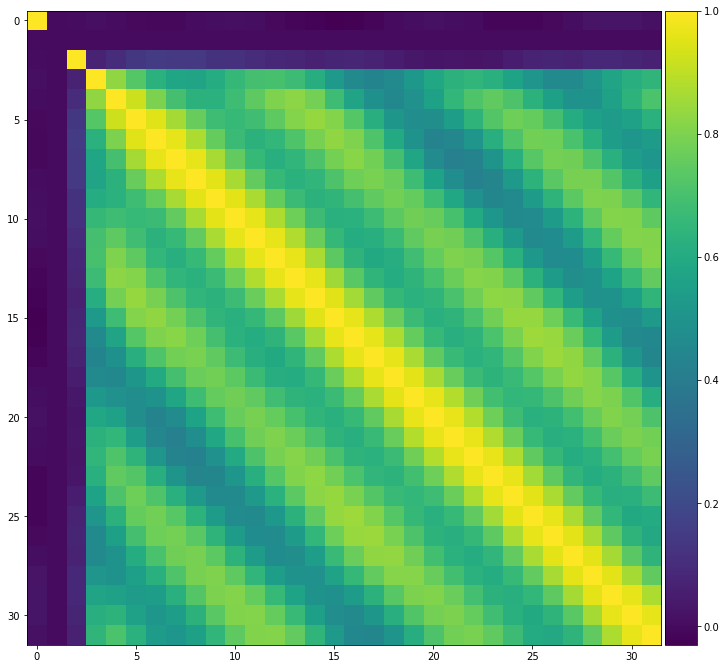

In [26]:
fig, ax = plt.subplots(figsize=(12, 12))
fig.patch.set_facecolor("#ffffff")
im = ax.imshow(position_sim.detach().numpy())
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()